In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

TASK = 'cpg_methylation'
RESULTS_DIR = '../downstream_tasks'
model = 'hyenadna-tiny-1k'

In [3]:
losses_path = os.path.join(RESULTS_DIR, TASK, model, 'losses.csv')
losses_df = pd.read_csv(losses_path)
losses_df

,Epoch,train_loss,val_loss,val_auroc
0,1,0.352147,0.368721,0.775283
1,2,0.338977,0.352849,0.793383
2,3,0.323370,0.348747,0.808167
3,4,0.313824,0.347141,0.815286
4,5,0.309334,0.333923,0.816265
...,...,...,...,...
95,96,0.272256,0.363138,0.826145
96,97,0.271689,0.359600,0.830596
97,98,0.270707,0.343911,0.832366
98,99,0.271147,0.358513,0.833893


In [4]:
df_melted = pd.melt(losses_df, id_vars='Epoch', var_name='Split', value_name='BCE Loss')
df_melted

,Epoch,Split,BCE Loss
0,1,train_loss,0.352147
1,2,train_loss,0.338977
2,3,train_loss,0.323370
3,4,train_loss,0.313824
4,5,train_loss,0.309334
...,...,...,...
295,96,val_auroc,0.826145
296,97,val_auroc,0.830596
297,98,val_auroc,0.832366
298,99,val_auroc,0.833893


In [5]:
results_path = os.path.join(RESULTS_DIR, TASK, model, 'best_model_metrics.csv')
results_df = pd.read_csv(results_path)
results_df

,Epoch,train_loss,val_loss,val_auroc,test_loss,test_auroc_avg,test_auroc_0,test_auroc_1,test_auroc_2,test_auroc_3,test_auroc_4,test_auroc_5,test_auroc_6
0,38.0,0.279362,0.314613,0.847261,0.343767,0.842264,0.831694,0.834385,0.829468,0.806678,0.932264,0.834379,0.826979


In [11]:
print('CpG Methylation mean AUROC: ',results_df['test_auroc_avg'].iloc[0])

CpG Methylation mean AUROC:  0.8422637958429171


Text(38.0, 0.2893622863398916, ' Tested checkpoint')

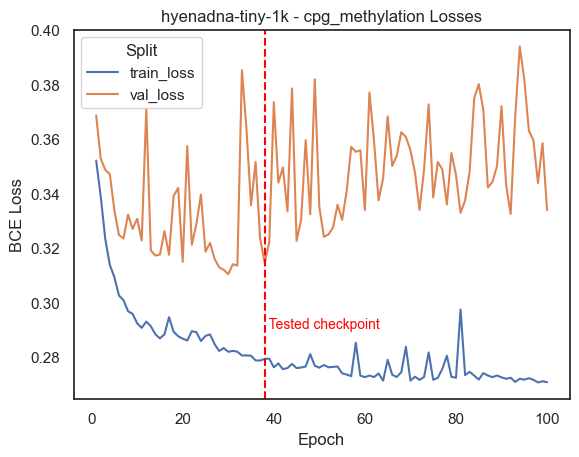

In [52]:
sns.set_theme(style="white")

sns.lineplot(data=df_melted[df_melted['Split'] != 'val_auroc'], x='Epoch', y='BCE Loss', hue='Split')
plt.title(f'{model} - {TASK} Losses')

# Add the point for "Best Checkpoint"
plt.axvline(x=results_df['Epoch'][0], color='red', linestyle='--', linewidth=1.5)
plt.text(results_df['Epoch'][0], results_df['train_loss'][0]+.01, ' Tested checkpoint', 
         horizontalalignment='left', verticalalignment='bottom', color='red', fontsize=10)